In [1]:

import sys
print(sys.version)



3.9.13 (v3.9.13:6de2ca5339, May 17 2022, 11:37:23) 
[Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
!pip install tensorflow pandas matplotlib Scikit-learn

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 764.0 kB/s eta 0:00:00 0:00:01
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.111.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
gradio 4.31.3 requires urllib3~=2.0, but you 

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [34]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
!pip list

Package                   Version
------------------------- ---------
absl-py                   1.4.0
aiodns                    3.0.0
aiofiles                  23.2.1
aiohttp                   3.8.4
aiohttp-socks             0.8.0
aiosignal                 1.3.1
altair                    5.3.0
annotated-types           0.6.0
anyio                     3.7.1
appdirs                   1.4.4
appnope                   0.1.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
astunparse                1.6.3
async-lru                 2.0.4
async-timeout             4.0.2
attrs                     23.1.0
Babel                     2.15.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blinker                   1.6.2
blis                      0.7.11
cachetools                5.3.1
catalogue                 2.0.10
cchardet                  2.1.7
certifi                   

In [6]:
from tensorflow.keras.layers import TextVectorization

In [7]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [8]:
MAX_FEATURES = 200000

In [9]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [10]:
vectorizer.adapt(X.values)

In [11]:
vectorizer('i am jeevana sandhya, studying in cbit .i am from hyderabad.i am a very bad student.but i hate the climate.')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 8, 74,  1, ...,  0,  0,  0])>

In [12]:
vectorized_text = vectorizer(X.values)

In [13]:
len(X)

159571

In [14]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [16]:
batch_size = 16 
num_batches = tf.data.experimental.cardinality(dataset)

num_samples = num_batches * batch_size

print("Number of batches:", num_batches.numpy())
print("Total number of samples:", num_samples.numpy())


Number of batches: 9974
Total number of samples: 159584


In [17]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [18]:
len(train)

6981

In [19]:
len(val)

1994

In [20]:
len(test)

997

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [23]:
model = Sequential()

model.add(Embedding(MAX_FEATURES+1, 32))

model.add(Bidirectional(LSTM(32, activation='tanh')))

model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 2929s 420ms/step - loss: 0.0615 - accuracy: 0.9852 - val_loss: 0.0448 - val_accuracy: 0.9941


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:

validation_results = model.evaluate(val)
accuracy = validation_results[1]  

print("Validation Accuracy:", accuracy)


1994/1994 [==============================] - 74s 37ms/step - loss: 0.0439 - accuracy: 0.9945
Validation Accuracy: 0.994483470916748


In [29]:
import tensorflow as tf

X_sample = ["i hate you"]  
X_sample_vectorized = vectorizer(X_sample)

model_output = model(X_sample_vectorized)

input_tensor = model.layers[0].input

layer_name = 'embedding'

intermediate_layer_model = tf.keras.Model(inputs=input_tensor, outputs=model.get_layer(layer_name).output)

X_sample_output = intermediate_layer_model.predict(X_sample_vectorized)


print("Output shape after", layer_name, ":", X_sample_output.shape)
print(X_sample_output)



1/1 [==============================] - 0s 28ms/step
Output shape after embedding : (1, 1800, 32)
[[[-0.1056076  -0.03102866 -0.0184241  ... -0.05861605  0.02765308
    0.00121529]
  [-0.00272822  0.08140998 -0.0864559  ...  0.05722705  0.02378934
   -0.10195798]
  [ 0.07222223  0.00812924 -0.03596937 ...  0.01758005  0.06042858
    0.02178022]
  ...
  [ 0.10182282 -0.05342513  0.1262306  ...  0.05996598 -0.03551833
   -0.04777443]
  [ 0.10182282 -0.05342513  0.1262306  ...  0.05996598 -0.03551833
   -0.04777443]
  [ 0.10182282 -0.05342513  0.1262306  ...  0.05996598 -0.03551833
   -0.04777443]]]


In [30]:
import tensorflow as tf

X_sample = ["i hate you"]  # Wrap the input text in a list
X_sample_vectorized = vectorizer(X_sample)


input_tensor = model.layers[0].input

layer_name = 'bidirectional'

intermediate_layer_model = tf.keras.Model(inputs=input_tensor, outputs=model.get_layer(layer_name).output)


X_sample_output = intermediate_layer_model.predict(X_sample_vectorized)


print("Output shape after", layer_name, ":", X_sample_output.shape)
print(X_sample_output)


1/1 [==============================] - 0s 243ms/step
Output shape after bidirectional : (1, 64)
[[ 2.19473895e-02 -1.13222394e-02 -1.59665793e-01  1.00624384e-02
  -4.83693555e-03  3.01448256e-03  1.46809518e-01 -4.06734552e-03
  -3.26959677e-02 -4.07899246e-02  8.72724969e-03  1.86852692e-03
  -5.64099755e-03 -1.51955308e-02  7.07125850e-03  1.06036793e-02
  -1.81647204e-02 -1.22704413e-02 -8.08329601e-03  8.87758005e-03
   4.33751522e-03 -7.63176614e-03  2.35555446e-04  1.13513857e-01
   4.55727428e-03  4.93063778e-03 -3.23952315e-03  5.57438731e-02
  -6.10191433e-04  6.89224387e-03  4.51746443e-03  3.52585339e-03
  -1.69174597e-01  2.83732951e-01  1.18815880e-02  9.57470089e-02
   4.91255969e-02  2.29192507e-02  7.41248354e-02 -5.06215617e-02
   2.84407318e-01 -7.85191059e-02  6.25621900e-02 -1.70857206e-01
  -3.47455069e-02  1.10733427e-01 -6.26100078e-02 -3.23854387e-01
   5.90109937e-02  8.18496197e-02  5.97449504e-02 -1.28590778e-01
   7.21803531e-02 -2.29801074e-01 -1.14948995e

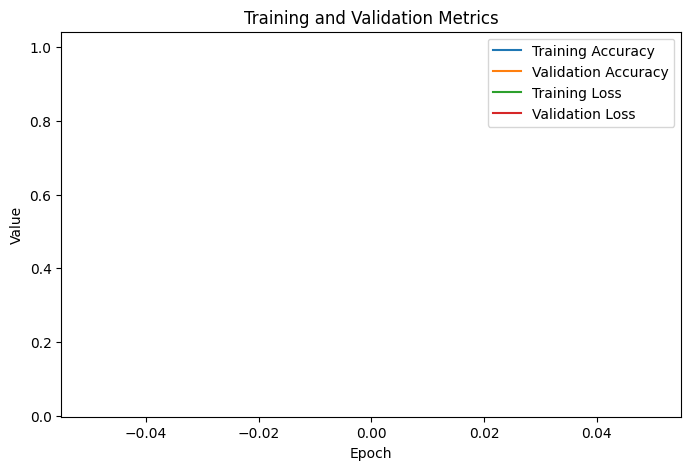

In [31]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()


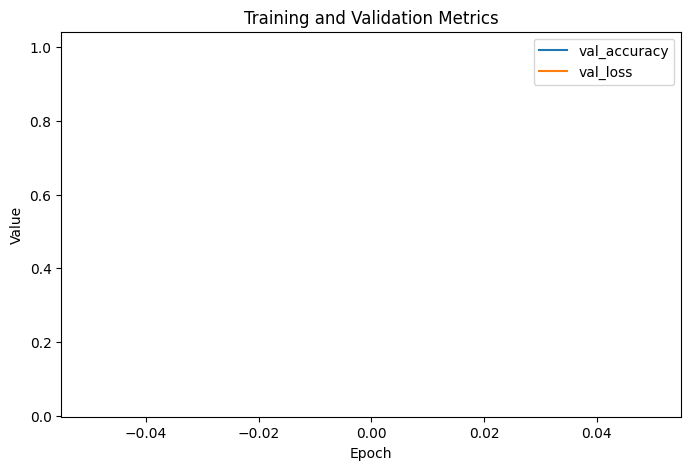

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 45ms/step
Precision: 0.09434553980827332, Recall:0.43234702944755554, Accuracy:0.31093278527259827


In [35]:
input_text = vectorizer('i am good')

In [36]:
model.save('toxicity.h5')

/Users/gadejeevanasandhya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
model = tf.keras.models.load_model('toxicity.h5')

In [38]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 255ms/step


In [39]:
res[0]

array([7.4468935e-01, 6.8133499e-04, 1.8147106e-01, 1.6321752e-02,
       4.4527352e-02, 1.2309125e-02], dtype=float32)

In [40]:

output_probs = res[0]

normalized_probs = [prob / sum(output_probs) for prob in output_probs]

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
max_index = normalized_probs.index(max(normalized_probs))
most_probable_label = labels[max_index]

print(f"Most probable label: {most_probable_label}, Probability: {max(normalized_probs)*100:.2f}%")


Most probable label: toxic, Probability: 74.47%


In [41]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [42]:
!python3 --version

Python 3.9.13


In [43]:
from nltk.corpus import wordnet

def recommend_good_words3(bad_word,output_probs):

    output_probs_list = output_probs.tolist() if isinstance(output_probs, np.ndarray) else output_probs

    recommended_words = set()

    synonyms = wordnet.synsets(bad_word)

    for syn in synonyms:
        for lemma in syn.lemmas():

            antonyms = lemma.antonyms()
            if antonyms:
                recommended_words.update(ant.name() for ant in antonyms)
    labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    max_index = output_probs_list.index(max(output_probs_list))
    most_probable_label = labels[max_index]            
    
    return most_probable_label,recommended_words

output_probs = np.array(res[0])

bad_word = "hate"
most_probable_label, recommended_words = recommend_good_words3(bad_word, output_probs)
print("Most probable label:", most_probable_label)
print("Recommended good words for '{}': {}".format(bad_word, list(recommended_words)))


Most probable label: toxic
Recommended good words for 'hate': ['love']


In [68]:
res[0][0]

0.7881993

In [44]:
def recommend_good_words(bad_word):
    recommended_words = set()

    synonyms = wordnet.synsets(bad_word)

    for syn in synonyms:
        for lemma in syn.lemmas():
            antonyms = lemma.antonyms()
            if antonyms:
                recommended_words.update(ant.name() for ant in antonyms)            

    return list(recommended_words)



In [45]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {:.2f}%\n'.format(col, results[0][idx] * 100)
        recommended_words = recommend_good_words(comment)
        if recommended_words:
            text += 'Recommended good words for {}: {}\n'.format(col, ", ".join(recommended_words))
    
    return text


In [47]:
import gradio as gr

In [48]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs="text")

In [49]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://1b02216f1f81a8a117.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 42ms/step


In [122]:
from nltk.corpus import wordnet

def recommend_good_words(bad_word):
    recommended_words = set()

    synonyms = wordnet.synsets(bad_word)

    for syn in synonyms:
        for lemma in syn.lemmas():
            antonyms = lemma.antonyms()
            if antonyms:
                recommended_words.update(ant.name() for ant in antonyms)            

    return list(recommended_words)

# Test the recommend_good_words function
bad_word = "hate"
recommended_words = recommend_good_words(bad_word)
print("Recommended good words for '{}': {}".format(bad_word, recommended_words))


Recommended good words for 'hate': ['love']


In [111]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {:.2f}%\n'.format(col, results[0][idx] * 100)
        # Pass the comment text to recommend_good_words
        recommended_words = recommend_good_words(comment)
        print("Recommended good words for '{}': {}".format(col, recommended_words))  # Add this line for debugging
        if recommended_words:
            text += 'Recommended good words for {}: {}\n'.format(col, ", ".join(recommended_words))
    
    return text

# Test the score_comment function with a sample comment
comment = "I hate this"
score_comment(comment)


1/1 [==============================] - 0s 45ms/step
Recommended good words for 'toxic': []
Recommended good words for 'severe_toxic': []
Recommended good words for 'obscene': []
Recommended good words for 'threat': []
Recommended good words for 'insult': []
Recommended good words for 'identity_hate': []


'toxic: 70.55%\nsevere_toxic: 0.03%\nobscene: 5.35%\nthreat: 1.53%\ninsult: 18.94%\nidentity_hate: 3.60%\n'

In [123]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}:{:.2f}%\n'.format(col, results[0][idx] * 100)
        # Pass the comment text to recommend_good_words
        recommended_words = recommend_good_words(comment)
        print("Recommended good words for '{}': {}".format(col, recommended_words))  # Debug print
        if recommended_words:
            text += 'Recommended good words for {}: {}\n'.format(col, ", ".join(recommended_words))
    
    return text

# Test the score_comment function with a sample comment
comment = "I hate this"
score_comment(comment)


1/1 [==============================] - 0s 67ms/step
Recommended good words for 'toxic': []
Recommended good words for 'severe_toxic': []
Recommended good words for 'obscene': []
Recommended good words for 'threat': []
Recommended good words for 'insult': []
Recommended good words for 'identity_hate': []


'toxic:70.55%\nsevere_toxic:0.03%\nobscene:5.35%\nthreat:1.53%\ninsult:18.94%\nidentity_hate:3.60%\n'